In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io.arff import loadarff
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
# rawData = arff.loadarff('')
# rawData = loadarff()
data = pd.read_csv('datasets/chronic_kidney_disease.csv')
data.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,ckd
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,1


<AxesSubplot:>

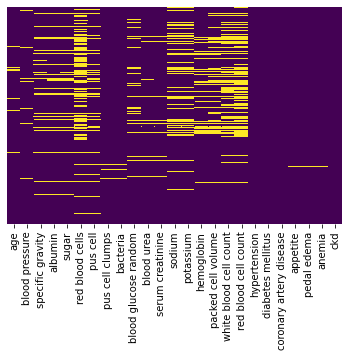

In [3]:
sb.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [ ]:
# sb.set_style("whitegrid")
# sb.countplot(x="class", data=data)

In [ ]:
data['red blood cells'] = pd.get_dummies(data['red blood cells'], drop_first=True)
data['pus cell'] = pd.get_dummies(data['pus cell'], drop_first=True)
data['pus cell clumps'] = pd.get_dummies(data['pus cell clumps'], drop_first=True)
data['bacteria'] = pd.get_dummies(data['bacteria'], drop_first=True)
data['hypertension'] = pd.get_dummies(data['hypertension'], drop_first=True)
data['diabetes mellitus'] = pd.get_dummies(data['diabetes mellitus'], drop_first=True)
data['coronary artery disease'] = pd.get_dummies(data['coronary artery disease'], drop_first=True)
data['appetite'] = pd.get_dummies(data['appetite'], drop_first=True)
data['pedal edema'] = pd.get_dummies(data['pedal edema'], drop_first=True)
data['anemia'] = pd.get_dummies(data['anemia'], drop_first=True)
data.head()

In [ ]:
import math
import numbers
# from pandas.api.types import is_numeric_dtype
# data.dropna(axis = 1, thresh=math.ceil(0.70 * data.shape[0])) #keep column if 50% data exists

for col in data.columns:
    # print(col, end=" ")
    # print(data[col].mean())
    data[col] = data[col].fillna(value=data[col].mean())

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
# sb.pairplot(data)

In [ ]:
sb.heatmap(data.corr())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = data.drop('ckd', axis = 1)
y = data['ckd']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

Decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dTree = DecisionTreeClassifier()
dTree.fit(x_train, y_train)

In [ ]:
predictions = dTree.predict(x_test)
plt.scatter(y_test, predictions)

In [ ]:
sb.distplot(y_test-predictions)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
metrics.mean_absolute_error(y_test, predictions)

In [ ]:
metrics.mean_squared_error(y_test, predictions)

In [ ]:
classification_report(y_test, predictions)

In [ ]:
confusion_matrix(y_test, predictions)

answer, predicted
[no, no] = 53
[no, yes] = 1
[yes, no] = 4
[yes, yes] = 102